In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import codecs
import warnings
warnings.filterwarnings('ignore')


# Data Cleaning, EDA and Feature Transformation

In [2]:
with codecs.open('laptop_price.csv', 'r', encoding='ISO-8859-1') as f:
    df1 = pd.read_csv(f)
df1.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
df1.shape

(1303, 13)

In [4]:
df1.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [5]:
df2 = df1.drop(['Product', 'laptop_ID'], axis=1)

In [6]:
df2.duplicated().value_counts()

False    1274
True       29
Name: count, dtype: int64

In [7]:
df3 = df2.drop_duplicates()
df3.duplicated().value_counts()

False    1274
Name: count, dtype: int64

In [8]:
def counts(column_name):
    print(df3[column_name].value_counts())
for i in df3.columns:
    counts(i)

Company
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
TypeName
Notebook              706
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: count, dtype: int64
Inches
15.6    646
14.0    193
17.3    164
13.3    160
12.5     39
11.6     31
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64
ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchsc

In [9]:
df3['ram(gb)'] = df3['Ram'].apply(lambda x: int(x.split('G')[0]))
df3['weight(kg)'] = df3['Weight'].apply(lambda x: float(x.split('k')[0]))

In [10]:
df4 = df3.drop(['Weight', 'Ram'], axis = 1)
df4.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Price_euros,ram(gb),weight(kg)
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,1339.69,8,1.37
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,898.94,8,1.34
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,575.00,8,1.86
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,2537.45,16,1.83
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,1803.60,8,1.37


In [11]:
df4['Inches'].value_counts()

Inches
15.6    646
14.0    193
17.3    164
13.3    160
12.5     39
11.6     31
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64

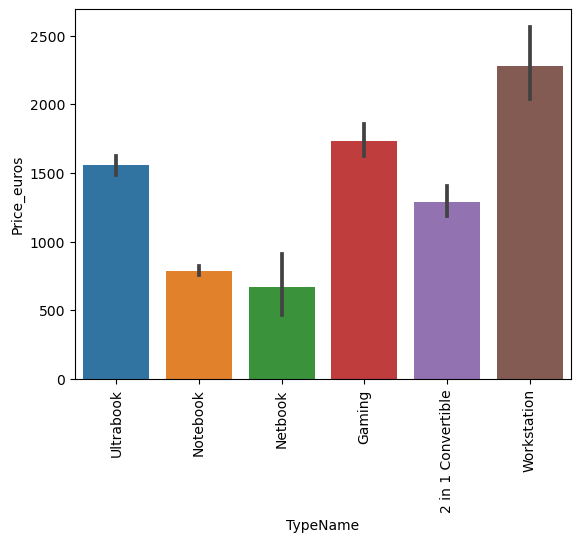

In [12]:
sns.barplot(x=df4['TypeName'], y=df4['Price_euros'])
plt.xticks(rotation = 'vertical')
plt.show()

In [13]:
df4['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscr

In [14]:
screenfeaturename = ['Touchscreen', 'IPS Panel', 'Full HD', 'Quad HD+', '4K Ultra HD', 'Retina Display']
for i in screenfeaturename:
    df4[i] = df4['ScreenResolution'].apply(lambda x: 1 if i in x else 0)


In [15]:
df4.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Price_euros,ram(gb),weight(kg),Touchscreen,IPS Panel,Full HD,Quad HD+,4K Ultra HD,Retina Display
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,1339.69,8,1.37,0,1,0,0,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,898.94,8,1.34,0,0,0,0,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,575.00,8,1.86,0,0,1,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,2537.45,16,1.83,0,1,0,0,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,1803.60,8,1.37,0,1,0,0,0,1


In [16]:
df4['resolution'] = df4['ScreenResolution'].apply(lambda x: x.split(' ')[-1])
df4.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Price_euros,ram(gb),weight(kg),Touchscreen,IPS Panel,Full HD,Quad HD+,4K Ultra HD,Retina Display,resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,1339.69,8,1.37,0,1,0,0,0,1,2560x1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,898.94,8,1.34,0,0,0,0,0,0,1440x900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,575.00,8,1.86,0,0,1,0,0,0,1920x1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,2537.45,16,1.83,0,1,0,0,0,1,2880x1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,1803.60,8,1.37,0,1,0,0,0,1,2560x1600


In [17]:
df4['x_resolution'] = df4['resolution'].apply(lambda x: x.split('x')[0])
df4['y_resolution'] = df4['resolution'].apply(lambda x: x.split('x')[1])
df4['x_resolution'] = df4['x_resolution'].astype('int')
df4['y_resolution'] = df4['y_resolution'].astype('int')
df4.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Price_euros,ram(gb),weight(kg),Touchscreen,IPS Panel,Full HD,Quad HD+,4K Ultra HD,Retina Display,resolution,x_resolution,y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,1339.69,8,1.37,0,1,0,0,0,1,2560x1600,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,898.94,8,1.34,0,0,0,0,0,0,1440x900,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,575.00,8,1.86,0,0,1,0,0,0,1920x1080,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,2537.45,16,1.83,0,1,0,0,0,1,2880x1800,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,1803.60,8,1.37,0,1,0,0,0,1,2560x1600,2560,1600


In [18]:
df5 = df4.drop(['ScreenResolution', 'resolution'], axis=1)
df5.head()

,Company,TypeName,Inches,Cpu,Memory,Gpu,OpSys,Price_euros,ram(gb),weight(kg),Touchscreen,IPS Panel,Full HD,Quad HD+,4K Ultra HD,Retina Display,x_resolution,y_resolution
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,1339.69,8,1.37,0,1,0,0,0,1,2560,1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,898.94,8,1.34,0,0,0,0,0,0,1440,900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,575.00,8,1.86,0,0,1,0,0,0,1920,1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,2537.45,16,1.83,0,1,0,0,0,1,2880,1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,1803.60,8,1.37,0,1,0,0,0,1,2560,1600


In [19]:
df5['Memory'].value_counts()


Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [20]:
df5['Memory'] = df5['Memory'].astype(str).replace('\.0', '', regex=True)
df5['Memory'] = df5['Memory'].str.replace('TB', '000GB')
df5[['combination1', 'combination2']] = df5['Memory'].str.split('+', expand=True)
df5['combination2'].fillna('no', inplace=True)
df5.sample(5)

,Company,TypeName,Inches,Cpu,Memory,Gpu,OpSys,Price_euros,ram(gb),weight(kg),Touchscreen,IPS Panel,Full HD,Quad HD+,4K Ultra HD,Retina Display,x_resolution,y_resolution,combination1,combination2
368,Dell,Notebook,15.6,Intel Core i7 7500U 2.7GHz,256GB SSD,AMD Radeon R7 M445,Windows 10,899.00,8,2.33,0,0,1,0,0,0,1920,1080,256GB SSD,no
513,Dell,Notebook,15.6,Intel Core i7 8550U 1.8GHz,256GB SSD + 2000GB HDD,AMD Radeon 530,Windows 10,1219.24,16,2.20,0,0,1,0,0,0,1920,1080,256GB SSD,2000GB HDD
422,HP,Notebook,15.6,Intel Core i7 7820HQ 2.9GHz,256GB SSD,Intel HD Graphics 630,Windows 10,1427.00,8,2.31,0,0,1,0,0,0,1920,1080,256GB SSD,no
972,Dell,Gaming,17.3,Intel Core i7 6700HQ 2.6GHz,256GB SSD + 1000GB HDD,Nvidia GeForce GTX 1070,Windows 10,2800.00,32,4.42,0,0,1,0,0,0,1920,1080,256GB SSD,1000GB HDD
395,HP,Ultrabook,15.6,AMD A9-Series 9420 3GHz,256GB SSD,AMD Radeon 520,Windows 10,499.00,4,1.91,0,0,1,0,0,0,1920,1080,256GB SSD,no


In [21]:
df5['ssd1'] = df5['combination1'].apply(lambda x: int(x.split('G')[0]) if 'SSD' in x else 0)
df5['ssd2'] = df5['combination2'].apply(lambda x: int(x.split('G')[0]) if 'SSD' in x else 0)
df5['ssd'] = df5['ssd1']+df5['ssd2']
df5['hdd1'] = df5['combination1'].apply(lambda x: int(x.split('G')[0]) if 'HDD' in x else 0)
df5['hdd2'] = df5['combination2'].apply(lambda x: int(x.split('G')[0]) if 'HDD' in x else 0)
df5['hdd'] = df5['hdd1']+df5['hdd2']
df5['flash1'] = df5['combination1'].apply(lambda x: int(x.split('G')[0]) if 'Flash' in x else 0)
df5['flash2'] = df5['combination2'].apply(lambda x: int(x.split('G')[0]) if 'Flash' in x else 0)
df5['flash_storage'] = df5['flash1']+df5['flash2']
df5['hybrid1'] = df5['combination1'].apply(lambda x: int(x.split('G')[0]) if 'Hybrid' in x else 0)
df5['hybrid2'] = df5['combination2'].apply(lambda x: int(x.split('G')[0]) if 'Hybrid' in x else 0)
df5['hybrid'] = df5['hybrid1']+df5['hybrid2']
df5.sample(5)

,Company,TypeName,Inches,Cpu,Memory,Gpu,OpSys,Price_euros,ram(gb),weight(kg),...,ssd,hdd1,hdd2,hdd,flash1,flash2,flash_storage,hybrid1,hybrid2,hybrid
503,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3350 1.1GHz,500GB HDD,Intel HD Graphics 500,Windows 10,299.00,4,2.10,...,0,500,0,500,0,0,0,0,0,0
262,HP,Notebook,15.6,Intel Core i5 8250U 1.6GHz,500GB HDD,Intel HD Graphics 620,Windows 10,722.00,4,2.10,...,0,500,0,500,0,0,0,0,0,0
153,MSI,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,256GB SSD + 1000GB HDD,Nvidia GeForce GTX 1060,Windows 10,1890.00,16,2.80,...,256,0,1000,1000,0,0,0,0,0,0
478,Dell,Notebook,15.6,Intel Core i5 8250U 1.6GHz,1000GB HDD,AMD Radeon 520,Windows 10,675.00,8,2.20,...,0,1000,0,1000,0,0,0,0,0,0
224,Dell,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,256GB SSD + 1000GB HDD,Nvidia GeForce GTX 1060,Windows 10,2456.34,16,4.42,...,256,0,1000,1000,0,0,0,0,0,0


In [22]:
df6 = df5.drop(['ssd1', 'ssd2', 'hdd1', 'hdd2', 'flash1', 'flash2', 'hybrid1', 'hybrid2', 'Memory', 'combination1', 'combination2'], axis=1)
df6.sample(5)

,Company,TypeName,Inches,Cpu,Gpu,OpSys,Price_euros,ram(gb),weight(kg),Touchscreen,...,Full HD,Quad HD+,4K Ultra HD,Retina Display,x_resolution,y_resolution,ssd,hdd,flash_storage,hybrid
36,Acer,Notebook,15.6,Intel Core i3 7130U 2.7GHz,Intel HD Graphics 620,Linux,367.0,4,2.10,0,...,0,0,0,0,1366,768,0,1000,0,0
1264,Dell,Notebook,15.6,Intel Celeron Dual Core N3050 1.6GHz,Intel HD Graphics,Windows 10,379.0,2,2.20,0,...,0,0,0,0,1366,768,0,500,0,0
1128,Lenovo,Gaming,15.6,Intel Core i5 7300HQ 2.5GHz,Nvidia GeForce GTX 1060,No OS,989.0,8,2.40,0,...,1,0,0,0,1920,1080,128,1000,0,0
189,Dell,Notebook,17.3,Intel Core i7 8550U 1.8GHz,AMD Radeon 530,Windows 10,1085.0,8,2.80,0,...,1,0,0,0,1920,1080,128,1000,0,0
861,HP,Notebook,15.6,Intel Core i5 7300U 2.6GHz,AMD Radeon R7 M465,Windows 10,1349.0,8,1.84,0,...,1,0,0,0,1920,1080,256,0,0,0


In [23]:
df6['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: count, Length: 118, dtype: int64

In [24]:
df6['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [25]:
df6['processor_types'] = df6['Cpu'].apply(lambda x: ' '.join(x.split()[0:3]))
df6.head()

,Company,TypeName,Inches,Cpu,Gpu,OpSys,Price_euros,ram(gb),weight(kg),Touchscreen,...,Quad HD+,4K Ultra HD,Retina Display,x_resolution,y_resolution,ssd,hdd,flash_storage,hybrid,processor_types
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,Intel Iris Plus Graphics 640,macOS,1339.69,8,1.37,0,...,0,0,1,2560,1600,128,0,0,0,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,Intel HD Graphics 6000,macOS,898.94,8,1.34,0,...,0,0,0,1440,900,0,0,128,0,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,Intel HD Graphics 620,No OS,575.00,8,1.86,0,...,0,0,0,1920,1080,256,0,0,0,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,AMD Radeon Pro 455,macOS,2537.45,16,1.83,0,...,0,0,1,2880,1800,512,0,0,0,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,Intel Iris Plus Graphics 650,macOS,1803.60,8,1.37,0,...,0,0,1,2560,1600,256,0,0,0,Intel Core i5


In [26]:
def cpu_type(processor):
    if processor == 'Intel Core i5' or processor == 'Intel Core i7' or processor == 'Intel Core i3':
        return processor
    else:
        if processor.split()[0] == 'Intel':
            return 'Intel other'
        elif processor.split()[0] == 'AMD':
            return 'AMD'
        else:
            return 'Other'

In [27]:
df6['cpu'] = df6['processor_types'].apply(cpu_type)
df6['cpu'].value_counts()


cpu
Intel Core i7    515
Intel Core i5    423
Intel other      141
Intel Core i3    134
AMD               60
Other              1
Name: count, dtype: int64

In [28]:
df7 = df6.drop(['Cpu', 'processor_types'], axis=1)
df7.head()

,Company,TypeName,Inches,Gpu,OpSys,Price_euros,ram(gb),weight(kg),Touchscreen,IPS Panel,...,Quad HD+,4K Ultra HD,Retina Display,x_resolution,y_resolution,ssd,hdd,flash_storage,hybrid,cpu
0,Apple,Ultrabook,13.3,Intel Iris Plus Graphics 640,macOS,1339.69,8,1.37,0,1,...,0,0,1,2560,1600,128,0,0,0,Intel Core i5
1,Apple,Ultrabook,13.3,Intel HD Graphics 6000,macOS,898.94,8,1.34,0,0,...,0,0,0,1440,900,0,0,128,0,Intel Core i5
2,HP,Notebook,15.6,Intel HD Graphics 620,No OS,575.00,8,1.86,0,0,...,0,0,0,1920,1080,256,0,0,0,Intel Core i5
3,Apple,Ultrabook,15.4,AMD Radeon Pro 455,macOS,2537.45,16,1.83,0,1,...,0,0,1,2880,1800,512,0,0,0,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Iris Plus Graphics 650,macOS,1803.60,8,1.37,0,1,...,0,0,1,2560,1600,256,0,0,0,Intel Core i5


In [29]:
df7['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [30]:
df7['gpu'] = df7['Gpu'].apply(lambda x: x.split()[0])
df7.head()

,Company,TypeName,Inches,Gpu,OpSys,Price_euros,ram(gb),weight(kg),Touchscreen,IPS Panel,...,4K Ultra HD,Retina Display,x_resolution,y_resolution,ssd,hdd,flash_storage,hybrid,cpu,gpu
0,Apple,Ultrabook,13.3,Intel Iris Plus Graphics 640,macOS,1339.69,8,1.37,0,1,...,0,1,2560,1600,128,0,0,0,Intel Core i5,Intel
1,Apple,Ultrabook,13.3,Intel HD Graphics 6000,macOS,898.94,8,1.34,0,0,...,0,0,1440,900,0,0,128,0,Intel Core i5,Intel
2,HP,Notebook,15.6,Intel HD Graphics 620,No OS,575.00,8,1.86,0,0,...,0,0,1920,1080,256,0,0,0,Intel Core i5,Intel
3,Apple,Ultrabook,15.4,AMD Radeon Pro 455,macOS,2537.45,16,1.83,0,1,...,0,1,2880,1800,512,0,0,0,Intel Core i7,AMD
4,Apple,Ultrabook,13.3,Intel Iris Plus Graphics 650,macOS,1803.60,8,1.37,0,1,...,0,1,2560,1600,256,0,0,0,Intel Core i5,Intel


In [31]:
df7['gpu'].value_counts()

gpu
Intel     703
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [32]:
df7 = df7[df7['gpu'] != 'ARM']
df8 = df7.drop('Gpu', axis = 1)
df8.head()

,Company,TypeName,Inches,OpSys,Price_euros,ram(gb),weight(kg),Touchscreen,IPS Panel,Full HD,...,4K Ultra HD,Retina Display,x_resolution,y_resolution,ssd,hdd,flash_storage,hybrid,cpu,gpu
0,Apple,Ultrabook,13.3,macOS,1339.69,8,1.37,0,1,0,...,0,1,2560,1600,128,0,0,0,Intel Core i5,Intel
1,Apple,Ultrabook,13.3,macOS,898.94,8,1.34,0,0,0,...,0,0,1440,900,0,0,128,0,Intel Core i5,Intel
2,HP,Notebook,15.6,No OS,575.00,8,1.86,0,0,1,...,0,0,1920,1080,256,0,0,0,Intel Core i5,Intel
3,Apple,Ultrabook,15.4,macOS,2537.45,16,1.83,0,1,0,...,0,1,2880,1800,512,0,0,0,Intel Core i7,AMD
4,Apple,Ultrabook,13.3,macOS,1803.60,8,1.37,0,1,0,...,0,1,2560,1600,256,0,0,0,Intel Core i5,Intel


In [33]:
df8['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

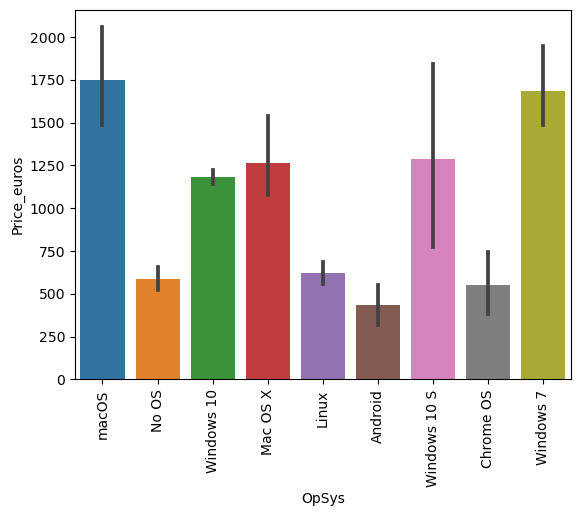

In [34]:
sns.barplot(x=df8['OpSys'], y=df8['Price_euros'])
plt.xticks(rotation = 'vertical')
plt.show()

In [35]:
def op_sys(sys):
    if sys=='Windows 7':
        return 'Windows 7'
    elif sys == 'Windows 10' or sys == 'Windows 10 S':
        return 'Windows 10/10 S'
    elif sys == 'macOS' or sys== 'Mac OS X':
        return 'Mac'
    else:
        return 'Others'

In [36]:
df8['op_sys'] = df8['OpSys'].apply(op_sys)
df9 = df8.drop('OpSys', axis=1)
df9.head()

,Company,TypeName,Inches,Price_euros,ram(gb),weight(kg),Touchscreen,IPS Panel,Full HD,Quad HD+,...,Retina Display,x_resolution,y_resolution,ssd,hdd,flash_storage,hybrid,cpu,gpu,op_sys
0,Apple,Ultrabook,13.3,1339.69,8,1.37,0,1,0,0,...,1,2560,1600,128,0,0,0,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,13.3,898.94,8,1.34,0,0,0,0,...,0,1440,900,0,0,128,0,Intel Core i5,Intel,Mac
2,HP,Notebook,15.6,575.00,8,1.86,0,0,1,0,...,0,1920,1080,256,0,0,0,Intel Core i5,Intel,Others
3,Apple,Ultrabook,15.4,2537.45,16,1.83,0,1,0,0,...,1,2880,1800,512,0,0,0,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,13.3,1803.60,8,1.37,0,1,0,0,...,1,2560,1600,256,0,0,0,Intel Core i5,Intel,Mac


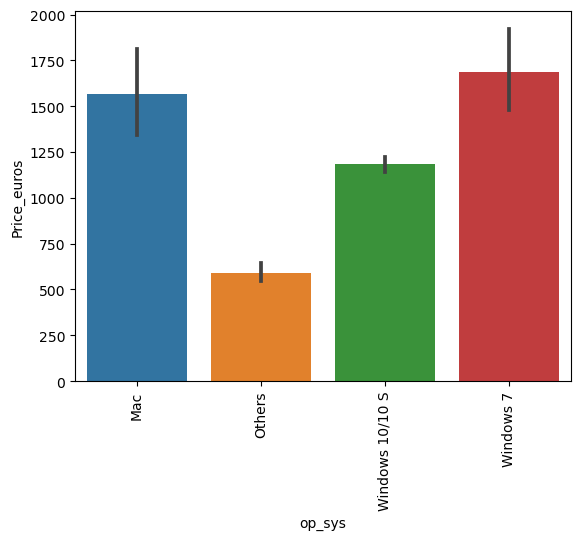

In [37]:
sns.barplot(x=df9['op_sys'], y=df9['Price_euros'])
plt.xticks(rotation = 'vertical')
plt.show()

In [38]:
df9['Company'].value_counts()

Company
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

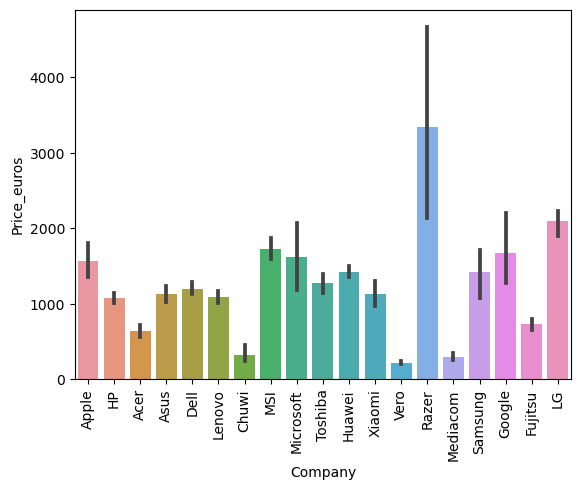

In [39]:
sns.barplot(x=df4['Company'], y=df4['Price_euros'])
plt.xticks(rotation = 'vertical')
plt.show()

In [40]:
df9.columns = df9.columns.str.replace(' ', '_')
df9.columns = df9.columns.str.lower()
df9.columns

Index(['company', 'typename', 'inches', 'price_euros', 'ram(gb)', 'weight(kg)',
       'touchscreen', 'ips_panel', 'full_hd', 'quad_hd+', '4k_ultra_hd',
       'retina_display', 'x_resolution', 'y_resolution', 'ssd', 'hdd',
       'flash_storage', 'hybrid', 'cpu', 'gpu', 'op_sys'],
      dtype='object')

In [41]:
heatmap = df9[['inches', 'price_euros', 'ram(gb)', 'weight(kg)',
       'touchscreen', 'ips_panel', 'full_hd', 'quad_hd+', '4k_ultra_hd',
       'retina_display', 'x_resolution', 'y_resolution', 'ssd', 'hdd',
       'flash_storage', 'hybrid']]

<Axes: >

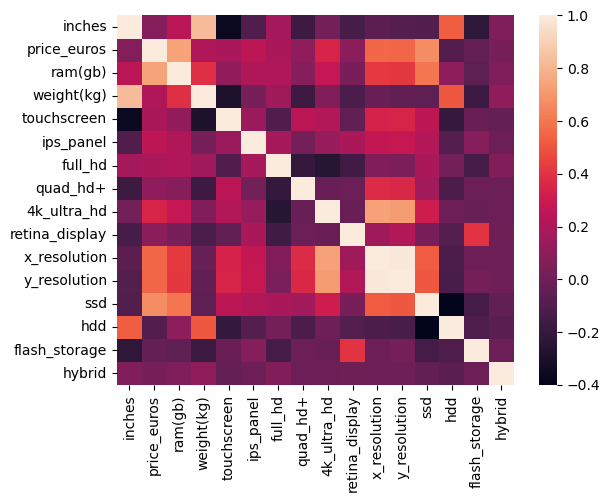

In [42]:
sns.heatmap(heatmap.corr())

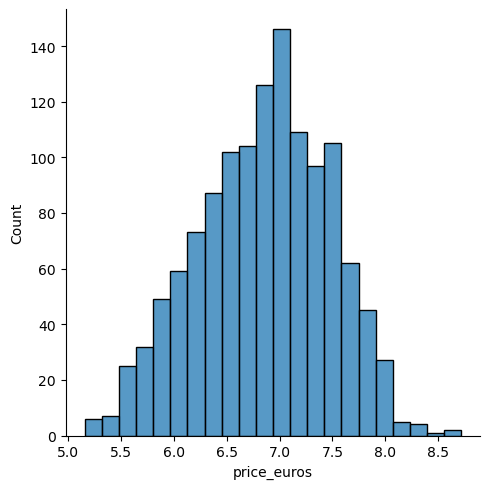

In [43]:
sns.displot(np.log(df9['price_euros']))

# Encoding

In [44]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
categorical_columns = df9.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['company', 'typename', 'cpu', 'gpu', 'op_sys']

In [46]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_columns = encoder.fit_transform(df9[categorical_columns])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))
encoded_df

,company_Apple,company_Asus,company_Chuwi,company_Dell,company_Fujitsu,company_Google,company_HP,company_Huawei,company_LG,company_Lenovo,...,typename_Workstation,cpu_Intel Core i3,cpu_Intel Core i5,cpu_Intel Core i7,cpu_Intel other,gpu_Intel,gpu_Nvidia,op_sys_Others,op_sys_Windows 10/10 S,op_sys_Windows 7
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [47]:
df10 = pd.concat([df9.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
df10

,company,typename,inches,price_euros,ram(gb),weight(kg),touchscreen,ips_panel,full_hd,quad_hd+,...,typename_Workstation,cpu_Intel Core i3,cpu_Intel Core i5,cpu_Intel Core i7,cpu_Intel other,gpu_Intel,gpu_Nvidia,op_sys_Others,op_sys_Windows 10/10 S,op_sys_Windows 7
0,Apple,Ultrabook,13.3,1339.69,8,1.37,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Apple,Ultrabook,13.3,898.94,8,1.34,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,HP,Notebook,15.6,575.00,8,1.86,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Apple,Ultrabook,15.4,2537.45,16,1.83,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Apple,Ultrabook,13.3,1803.60,8,1.37,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,15.6,720.32,4,2.20,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1269,Lenovo,2 in 1 Convertible,14.0,638.00,4,1.80,1,1,1,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1270,Lenovo,2 in 1 Convertible,13.3,1499.00,16,1.30,1,1,0,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1271,Lenovo,Notebook,14.0,229.00,2,1.50,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [48]:
df11 = df10.drop(categorical_columns, axis=1)
df11.shape

(1273, 48)

# Model Selection

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [50]:
x = df11.drop(['price_euros'], axis=1)
y = np.log(df11['price_euros'])

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3)
def score(model):
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    print(model)
    print('R2_score:', r2_score(y_test, preds))
    print('MAE:', mean_absolute_error(y_test, preds))
    print('Cross val score:', cross_val_score(model, x, y), '\n')


In [52]:
model = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), AdaBoostRegressor(), SVR(), XGBRegressor(), LGBMRegressor()]
for i in model:
    score(i)

LinearRegression()
R2_score: 0.8331350458383191
MAE: 0.19951776385003428
Cross val score: [0.80272315 0.83851078 0.83844804 0.71348336 0.83792923] 

Ridge()
R2_score: 0.8306453885251308
MAE: 0.20026611792258528
Cross val score: [0.80155379 0.840827   0.83997006 0.71500023 0.8341959 ] 

Lasso()
R2_score: 0.552451711404481
MAE: 0.33718524581564313
Cross val score: [0.51383163 0.51921712 0.52024934 0.39424608 0.49041212] 

DecisionTreeRegressor()
R2_score: 0.8304611362190478
MAE: 0.1926264153116111
Cross val score: [0.77595983 0.77822631 0.82888777 0.78349649 0.73552359] 

RandomForestRegressor()
R2_score: 0.8834191889892774
MAE: 0.16475028641214795
Cross val score: [0.83216349 0.89571472 0.87807145 0.84572294 0.84959256] 

GradientBoostingRegressor()
R2_score: 0.8728584288081376
MAE: 0.1730220858615769
Cross val score: [0.83594175 0.88796478 0.87270186 0.81804205 0.86590872] 

AdaBoostRegressor()
R2_score: 0.8089601672012494
MAE: 0.21489374535550168
Cross val score: [0.73172694 0.8259646

# Hyperparameter Tuning(RandomizedSearchCV)

In [55]:
rfr = RandomForestRegressor()
parameters1 = {'n_estimators' : [n for n in range(10, 200, 10)],
              

}
classifier1 = RandomizedSearchCV(rfr, parameters1, cv=5)
classifier1.fit(x, y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190]})

In [56]:
gbr = GradientBoostingRegressor()
parameters2 = {'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
               'criterion' : ['friedman_mse', 'squared_error'],
               'max_features' : ['auto', 'sqrt', 'log2'],
               'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5],
               'n_estimators' : [n for n in range(10, 200, 10)],
               'max_depth' : [n for n in range(5, 50, 5)],
               'min_samples_split': [n for n in range(2, 20, 2)],
               'min_samples_leaf': [n for n in range(2, 20, 2)],
               'max_features': ['log2', 'sqrt'],
               'random_state' : [n for n in range(0, 1000, 100)],
               'alpha' : [0.1, 0.3, 0.5, 0.7, 0.9]                  
               }
classifier2 = RandomizedSearchCV(gbr, parameters2, cv=5)
classifier2.fit(x, y)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
                                        'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [2, 4, 6, 8, 10, 12,
                                                             14, 16, 18],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190],
                                        'random_state': [0, 100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900]})

In [57]:
xgbr = XGBRegressor()
parameters3 = {'booster' : ['gbtree', 'dart'],
               'dart_normalized_type' : ['tree', 'forest'], 
               'tree_method' : ['auto', 'exact', 'approx', 'hist'],
               'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5]
}
classifier3 = RandomizedSearchCV(xgbr, parameters3, cv=5)
classifier3.fit(x, y)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'booster': ['gbtree', 'dart'],
                                        'dart_normalized_type': ['tree',
                                                                 'forest'],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5],
                                        'tree_method': ['auto', 'exact',
                                                        'approx', 'hist']})

In [58]:
lgbmr = LGBMRegressor()
parameters4 = {'boosting_type' : ['gbdt', 'rf', 'dart'],
              'max_depth' : [n for n in range(5, 50, 5)],
              'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5],
              'n_estimators' : [n for n in range(10, 200, 10)],
              'random_state' : [n for n in range(0, 1000, 100)]

}
classifier4 = RandomizedSearchCV(lgbmr, parameters4, cv=5)
classifier4.fit(x, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 1018, number of used features: 33
[LightGBM] [Info] Start training from score 6.883113
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 1018, number of used features: 32
[LightGBM] [Info] Start training from score 6.855220
[LightGBM] [Warning] Found white

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(),
                   param_distributions={'boosting_type': ['gbdt', 'rf', 'dart'],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190],
                                        'random_state': [0, 100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900]})

In [59]:
random_search_models = [RandomForestRegressor(criterion='poisson', max_depth=30, max_features='sqrt',
                      min_samples_leaf=4, min_samples_split=6, n_estimators=180,
                      random_state=900),
                        GradientBoostingRegressor(alpha=0.1, criterion='squared_error', learning_rate=0.2, loss='huber', max_depth=20, max_features='sqrt', min_samples_leaf=12, min_samples_split=4, n_estimators=160, random_state=200),
                        XGBRegressor(booster = 'dart', dart_normalized_type = 'tree', learning_rate=0.2), 
                        LGBMRegressor(max_depth=45, n_estimators=150, random_state=500)]
for i in random_search_models:
    score(i)

RandomForestRegressor(criterion='poisson', max_depth=30, max_features='sqrt',
                      min_samples_leaf=4, min_samples_split=6, n_estimators=180,
                      random_state=900)
R2_score: 0.85198490403667
MAE: 0.18632277535844757
Cross val score: [0.78634086 0.87465492 0.84469917 0.78521535 0.8148813 ] 

GradientBoostingRegressor(alpha=0.1, criterion='squared_error',
                          learning_rate=0.2, loss='huber', max_depth=20,
                          max_features='sqrt', min_samples_leaf=12,
                          min_samples_split=4, n_estimators=160,
                          random_state=200)
R2_score: 0.8798509704423185
MAE: 0.1648644170044572
Cross val score: [0.88506545 0.89136254 0.89598411 0.83261236 0.86308784] 

XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, dart_normalized_type='tree', device=None,
             early_stopping_ro

# Hyperparameter Tuning(GridSearchCV)

In [60]:
final_parameters = {'booster' : ['gbtree'],
                    'dart_normalized_type' : ['tree'], 
                    'tree_method' : ['auto'],
                    'learning_rate' : [0.2],
                    'max_depth' : [n for n in range(5, 50, 10)],
                    'n_estimators' : [n for n in range(10, 200, 50)],
                    'random_state' : [n for n in range(0, 1000, 200)]
}
gridclassifier = GridSearchCV(xgbr, final_parameters, cv=3)
gridclassifier.fit(x, y)
best_parameters = gridclassifier.best_params_
print(best_parameters)

{'booster': 'gbtree', 'dart_normalized_type': 'tree', 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 110, 'random_state': 0, 'tree_method': 'auto'}


In [62]:
final_model = XGBRegressor(booster = 'gbtree', dart_normalized_type='tree', learning_rate=0.2, tree_method = 'auto', max_depth = 5, n_estimators = 110, random_state=0)
score(final_model)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, dart_normalized_type='tree', device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=110,
             n_jobs=None, num_parallel_tree=None, ...)
R2_score: 0.8787616289793478
MAE: 0.16293724503019058
Cross val score: [0.86493851 0.89923233 0.88053283 0.84954702 0.86714248] 

